#### `MAT388E FINAL PROJECT`

# Analysis of Traffic Accidents in UK and Predictions

#### Ezgi Kızılay 090200740 kizilay18

### Introduction

In this project, I want to investigate the accidents in UK for finding the reasons behind them. I believe that this study can inspire about traffic accidents all over the world. One of the main purpose of this project is analyzing the conditions of accidents and related results. I want to visualize my analysis with graphics. More then, I want to make a model to predict outcome of accident under known conditions.

#### Dataset References 

[Dataset](https://www.kaggle.com/datasets/daveianhickey/2000-16-traffic-flow-england-scotland-wales?select=accidents_2012_to_2014.csv): Dave Fisher-Hickey, 2017. Kaggle, accessed Nov 2022.

I aim to find answers to the following questions at the end of the project:

- What increases accident rates?
- Can we predict accident rates over time?
- How does road types affect accidents?
- How did rural and urban areas differ?
- Can we predict accident outcomes?
- How does light conditions affect accidents?
- How does weather conditions affet accidents

### Importing Libraries

In [71]:
import pandas as pd
import os
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from collections import Counter,OrderedDict
import math
import datetime as dt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit
from statsmodels.api import Logit
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor

### Ingesting and Inspecting The Datasets

- I ingested the datasets from kaggle.

In [4]:
import os
os.environ['KAGGLE_USERNAME'] = "ezgikizilay"
os.environ['KAGGLE_KEY'] = "b25675f9aa385d266801da5383362a9b"

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

api.dataset_download_files('daveianhickey/2000-16-traffic-flow-england-scotland-wales', path='.\\2000-16-traffic-flow-england-scotland-wales',unzip=True)
d05_07 = pd.read_csv('2000-16-traffic-flow-england-scotland-wales/accidents_2005_to_2007.csv')
d09_11 = pd.read_csv('2000-16-traffic-flow-england-scotland-wales/accidents_2009_to_2011.csv')
d12_14 = pd.read_csv('2000-16-traffic-flow-england-scotland-wales/accidents_2012_to_2014.csv')

C:\Users\ezgik\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Accidents data is split across three CSV files. The dataset gives details about accidents in UK. These three files together constitute 1.6 million traffic accidents. The total time period is 2005 through 2014, but 2008 is missing.
#### The datasets contains 33 columns about details of accidents for per range.

In [5]:
d05_07.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [6]:
d09_11.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200901BS70001,524910,180800,-0.201349,51.512273,1,2,2,1,01/01/2009,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002882,2009
1,200901BS70002,525050,181040,-0.199248,51.514399,1,2,2,11,05/01/2009,...,Zebra crossing,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002886,2009
2,200901BS70003,526490,177990,-0.179599,51.486668,1,3,2,1,04/01/2009,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002912,2009
3,200901BS70004,524800,180300,-0.203110,51.507804,1,2,2,1,05/01/2009,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Other,Frost/Ice,None,None,1,Yes,E01002871,2009
4,200901BS70005,526930,177490,-0.173445,51.482076,1,2,2,1,06/01/2009,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002840,2009


In [7]:
d12_14.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002890,2012


### Cleaning, Prepairing and Merging The Datasets

- Firstly, I append all datasets to each other.
- I dropped the columns with the most missing values.
- I dropped NAs.
- Longitude value was negative. I multiply it with -1 to turn positive.
- I fixed the date time format.

In [208]:
df = d05_07.append(d09_11, ignore_index=True)

In [209]:
df = df.append(d12_14, ignore_index=True)

In [121]:
df #combination of datasets

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
1504146,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
1504147,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
1504148,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [11]:
df.isnull().sum()

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

In [210]:
df = df.drop(['Junction_Detail', 'Junction_Control','Did_Police_Officer_Attend_Scene_of_Accident','LSOA_of_Accident_Location'], axis=1)
df.dropna(inplace = True)
df['Longitude'] = df['Longitude']*-1
df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Year
0,200501BS00001,525680.0,178240.0,0.191170,51.489096,1,2,1,1,04/01/2005,...,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,2005
1,200501BS00002,524170.0,181650.0,0.211708,51.520075,1,3,1,1,05/01/2005,...,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,2005
2,200501BS00003,524520.0,182240.0,0.206458,51.525301,1,3,2,1,06/01/2005,...,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,2005
3,200501BS00004,526900.0,177530.0,0.173862,51.482442,1,3,1,1,07/01/2005,...,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,2005
4,200501BS00005,528060.0,179040.0,0.156618,51.495752,1,3,1,1,10/01/2005,...,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,2.01E+12,310037.0,597647.0,3.417278,55.264773,98,2,2,1,07/12/2014,...,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,2014
1504146,2.01E+12,321509.0,574063.0,3.230255,55.054855,98,3,2,2,11/12/2014,...,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,2014
1504147,2.01E+12,321337.0,566365.0,3.230826,54.985668,98,3,1,1,09/12/2014,...,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,2014
1504148,2.01E+12,323869.0,566853.0,3.191397,54.990446,98,2,3,2,17/12/2014,...,43,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,2014


In [13]:
df.isnull().sum()

Accident_Index                             0
Location_Easting_OSGR                      0
Location_Northing_OSGR                     0
Longitude                                  0
Latitude                                   0
Police_Force                               0
Accident_Severity                          0
Number_of_Vehicles                         0
Number_of_Casualties                       0
Date                                       0
Day_of_Week                                0
Time                                       0
Local_Authority_(District)                 0
Local_Authority_(Highway)                  0
1st_Road_Class                             0
1st_Road_Number                            0
Road_Type                                  0
Speed_limit                                0
2nd_Road_Class                             0
2nd_Road_Number                            0
Pedestrian_Crossing-Human_Control          0
Pedestrian_Crossing-Physical_Facilities    0
Light_Cond

In [14]:
df.shape

(1501799, 29)

In [15]:
df.dtypes

Accident_Index                              object
Location_Easting_OSGR                      float64
Location_Northing_OSGR                     float64
Longitude                                  float64
Latitude                                   float64
Police_Force                                 int64
Accident_Severity                            int64
Number_of_Vehicles                           int64
Number_of_Casualties                         int64
Date                                        object
Day_of_Week                                  int64
Time                                        object
Local_Authority_(District)                   int64
Local_Authority_(Highway)                   object
1st_Road_Class                               int64
1st_Road_Number                              int64
Road_Type                                   object
Speed_limit                                  int64
2nd_Road_Class                               int64
2nd_Road_Number                

In [211]:
df["Time"] = pd.to_datetime(df["Time"], format='%H:%M')
df["Hour"] = df["Time"].dt.hour
df["Month"] = pd.DatetimeIndex(df["Date"]).month
df.Year = df.Year.astype(str)
df.Hour = df.Hour.astype(str)
df.Month = df.Month.astype(str)

In [17]:
df.dtypes

Accident_Index                                     object
Location_Easting_OSGR                             float64
Location_Northing_OSGR                            float64
Longitude                                         float64
Latitude                                          float64
Police_Force                                        int64
Accident_Severity                                   int64
Number_of_Vehicles                                  int64
Number_of_Casualties                                int64
Date                                               object
Day_of_Week                                         int64
Time                                       datetime64[ns]
Local_Authority_(District)                          int64
Local_Authority_(Highway)                          object
1st_Road_Class                                      int64
1st_Road_Number                                     int64
Road_Type                                          object
Speed_limit   

### Analysis and Visualizations

#### Number of accidents group by Year:

In [45]:
accidents = df.groupby("Year")
num_accidents=pd.DataFrame(accidents.size().sort_values(ascending=False),columns=["num"])
num_accidents

,num
Year,
2005,198367
2006,188884
2007,181864
2012,179436
2009,163331
2010,154185
2011,151241
2014,146099
2013,138392


#### Visualizations

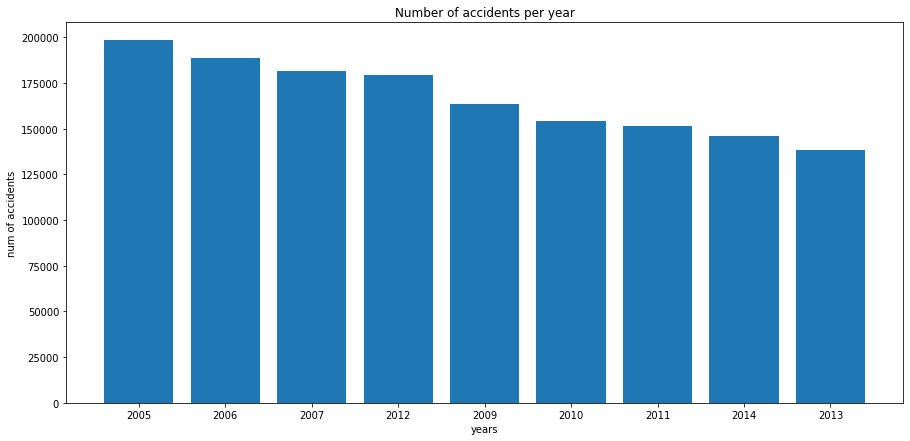

In [46]:
fig, ax = plt.subplots(figsize = (15,7))
plt.bar(num_accidents.index,num_accidents['num'])
plt.xlabel('years')
plt.ylabel('num of accidents')
plt.title('Number of accidents per year')

plt.show()

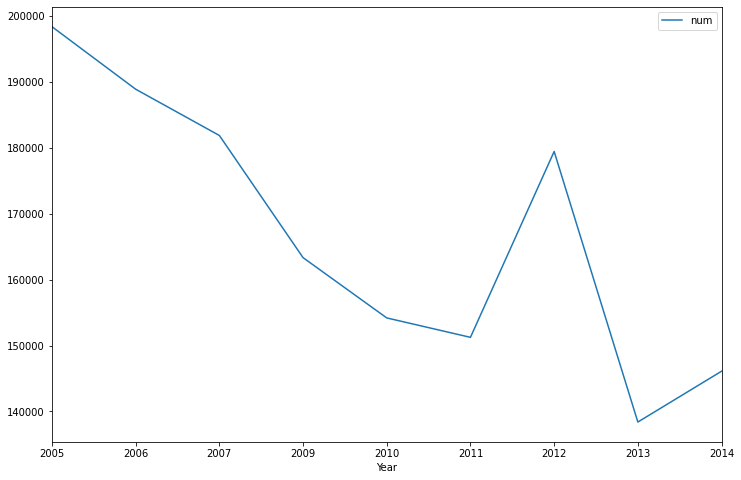

In [47]:
num_accidents=pd.DataFrame(accidents.size(),columns=["num"])
num_accidents.plot()

#### Number of accidents that occurred under certain conditions:

In [20]:
roads = df.groupby("Road_Type")
roads = pd.DataFrame(roads.size().sort_values(ascending=False),columns=["roads"])
lights = df.groupby("Light_Conditions")
lights = pd.DataFrame(lights.size().sort_values(ascending=False),columns=["lights"])
weathers = df.groupby("Weather_Conditions")
weathers = pd.DataFrame(weathers.size().sort_values(ascending=False),columns=["weathers"])
surfaces = df.groupby("Road_Surface_Conditions")
surfaces = pd.DataFrame(surfaces.size().sort_values(ascending=False),columns=["surfaces"])
hours = df.groupby("Hour")
hours=pd.DataFrame(hours.size().sort_values(ascending=False),columns=["hours"])
months = df.groupby("Month")
months=pd.DataFrame(months.size().sort_values(ascending=False),columns=["months"])

#### Visualizations

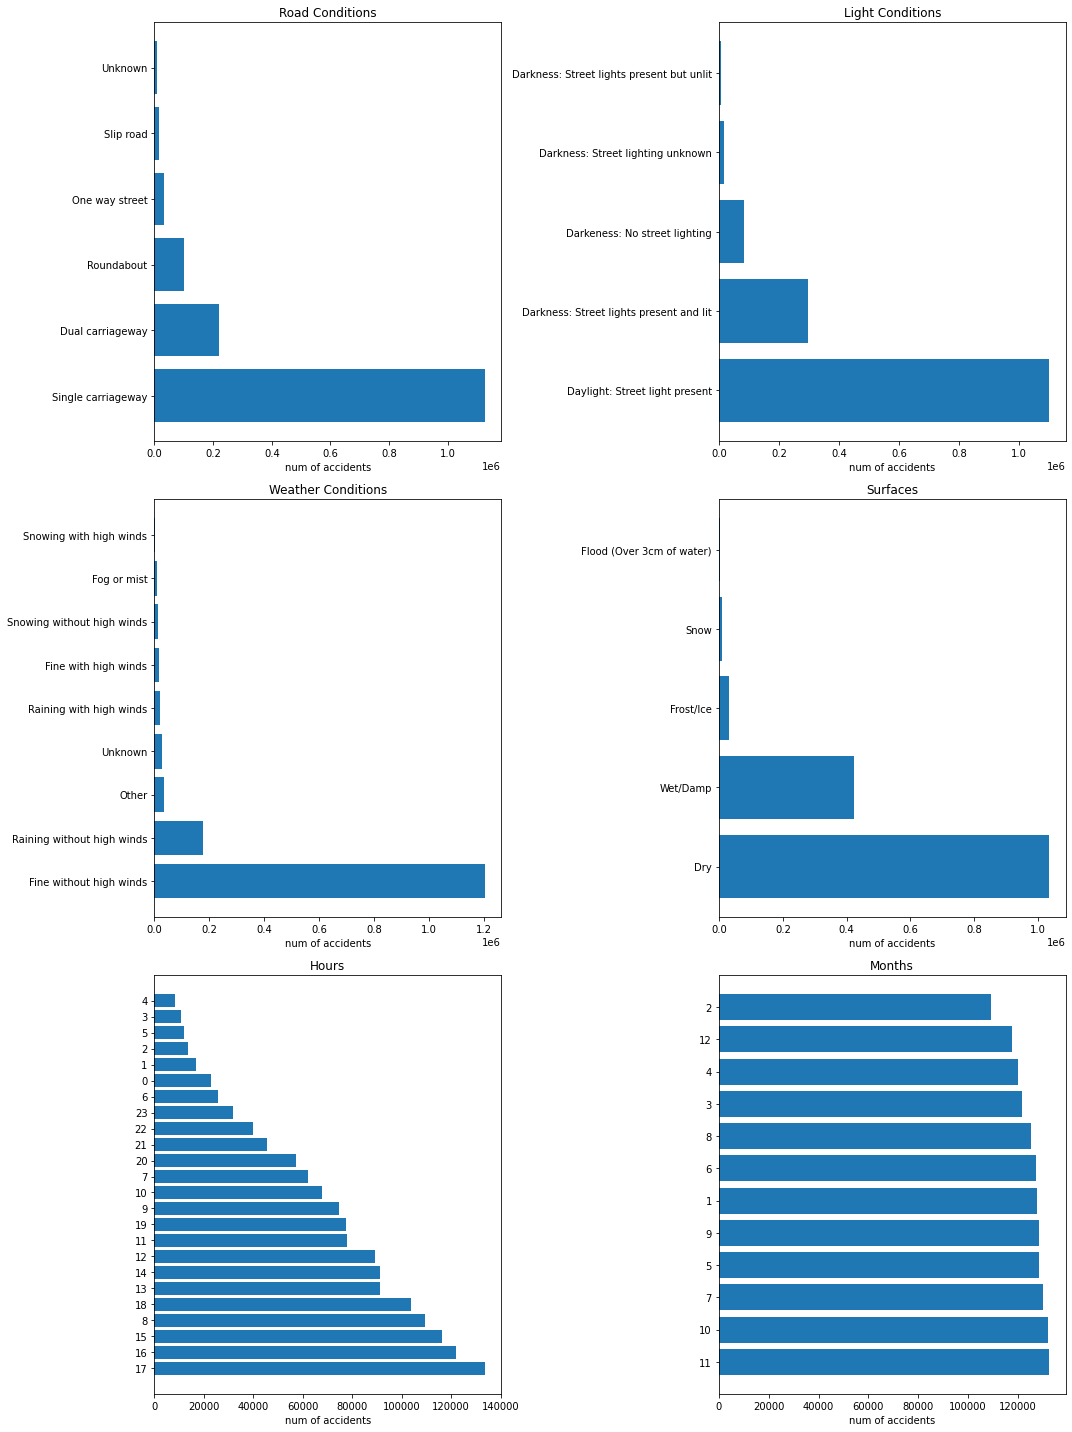

In [21]:
fig = plt.subplots(figsize = (15,20)) 

plt.subplot(3, 2, 1)
labels = roads.index
values = roads['roads']
plt.barh(labels,values)
plt.title('Road Conditions')
plt.xlabel('num of accidents')

plt.subplot(3, 2, 2)
labels = lights.index
values = lights['lights']
plt.barh(labels,values)
plt.title('Light Conditions')
plt.xlabel('num of accidents')

plt.subplot(3, 2, 3)
labels = weathers.index
values = weathers['weathers']
plt.barh(labels,values)
plt.title('Weather Conditions')
plt.xlabel('num of accidents')

plt.subplot(3, 2, 4)
labels = surfaces.index
values = surfaces['surfaces']
plt.barh(labels,values)
plt.title('Surfaces')
plt.xlabel('num of accidents')

plt.subplot(3, 2, 5)
labels = hours.index
values = hours['hours']
plt.barh(labels,values)
plt.title('Hours')
plt.xlabel('num of accidents')

plt.subplot(3, 2, 6)
labels = months.index
values = months['months']
plt.barh(labels,values)
plt.title('Months')
plt.xlabel('num of accidents')

plt.tight_layout()

plt.show()

#### Number of accidents according to speeds:

In [29]:
df.Speed_limit = df.Speed_limit.astype(str)
Speeds = df.groupby("Speed_limit")
Speeds=pd.DataFrame(Speeds.size().sort_values(ascending=False),columns=["Speeds"])

#### Visualizations

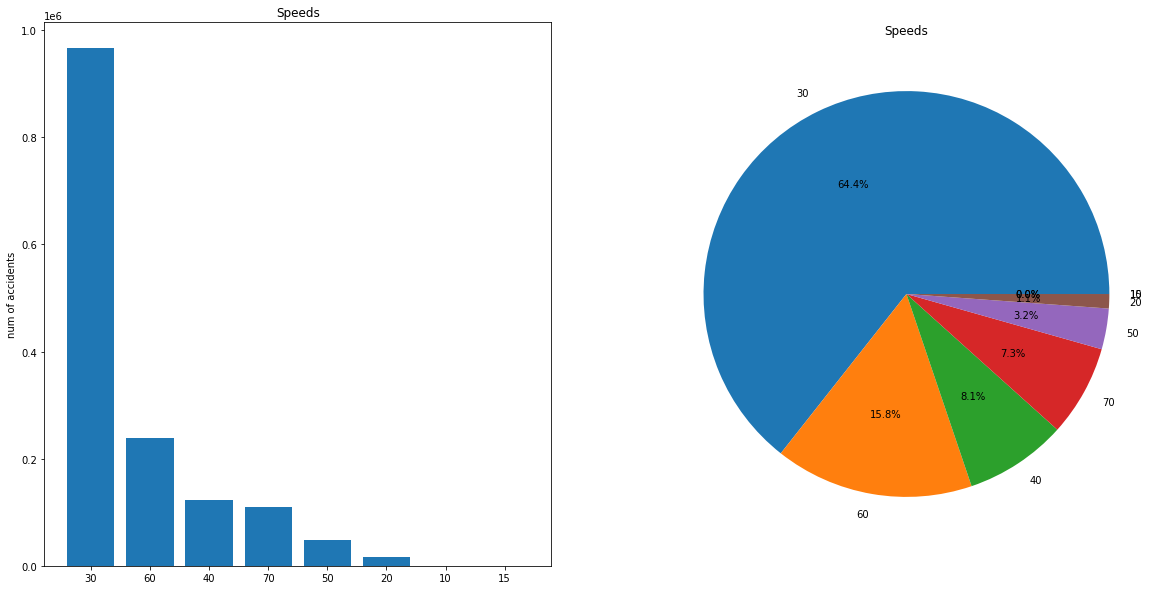

In [32]:
fig = plt.subplots(figsize = (20,10)) 

plt.subplot(1, 2, 2)
labels = Speeds.index
values = Speeds['Speeds']
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Speeds')

plt.subplot(1, 2, 1)
plt.bar(Speeds.index,Speeds['Speeds'])
plt.title("Speeds")
plt.ylabel('num of accidents')

plt.show()

#### Heatmap visualizations for differenet conditions:

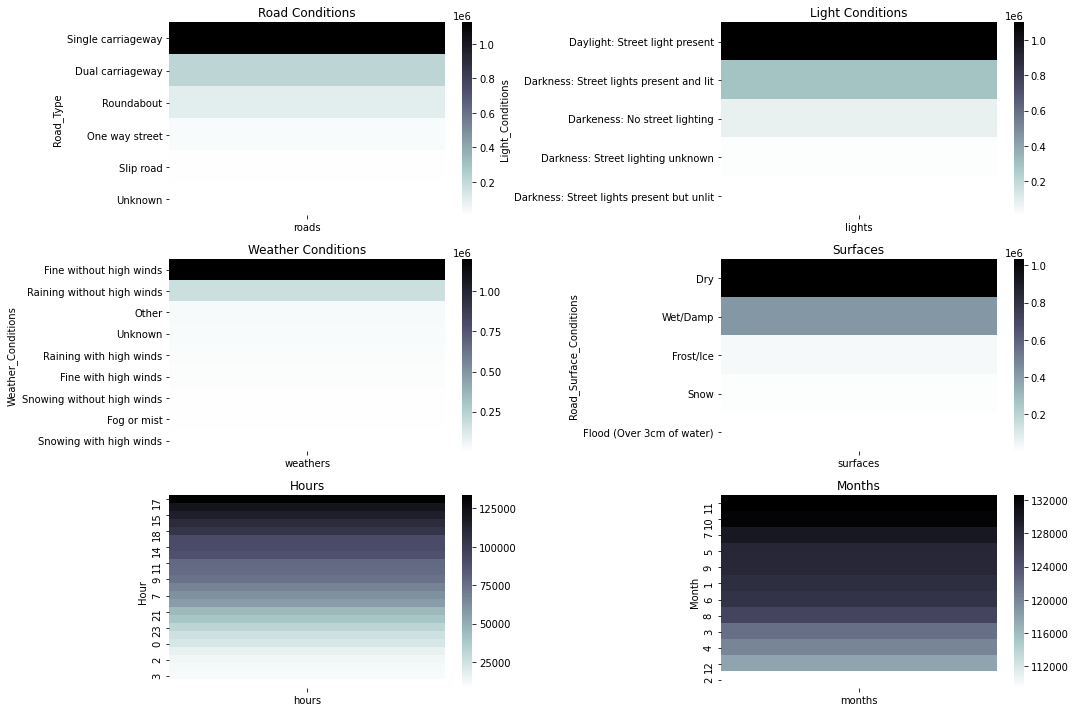

In [43]:
fig = plt.subplots(figsize = (15,10)) 

plt.subplot(3, 2, 1)
sns.heatmap(roads, cmap='bone_r')
plt.title('Road Conditions')

plt.subplot(3, 2, 2)
sns.heatmap(lights, cmap='bone_r')
plt.title('Light Conditions')

plt.subplot(3, 2, 3)
sns.heatmap(weathers, cmap='bone_r')
plt.title('Weather Conditions')

plt.subplot(3, 2, 4)
sns.heatmap(surfaces, cmap='bone_r')
plt.title('Surfaces')

plt.subplot(3, 2, 5)
sns.heatmap(hours, cmap='bone_r')
plt.title('Hours')

plt.subplot(3, 2, 6)
sns.heatmap(months, cmap='bone_r')
plt.title('Months')

plt.tight_layout()

plt.show()

### Relations (linear regression model)

In [53]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Year', 'Hour', 'Month'],
      dtype='object')

In [212]:
df.Speed_limit = df.Speed_limit.astype(int)

In [89]:
data = df[['Speed_limit', 'Number_of_Casualties','Longitude', 'Latitude']]

#### Our first model worked great! This model includes two of indicators as independent varibale with combination of them. R-squared value is 1, and also when look at the p-values of variables, they are really suitable because less than 0.05:

In [90]:
X = data[['Number_of_Casualties','Speed_limit']]
XX = sm.add_constant(X)
Y = data[['Speed_limit']]
results = sm.OLS(Y.astype(float), XX.astype(float)).fit();
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Speed_limit   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.840e+29
Date:                Fri, 30 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:40:46   Log-Likelihood:             3.5317e+07
No. Observations:             1501799   AIC:                        -7.063e+07
Df Residuals:                 1501796   BIC:                        -7.063e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.907e-12 

#### This model includes four of indicators as independent varibale with combination of them. R-squared value is 1, but when look at the p-values of variables, they are not suitable because bigger than 0.05.

In [91]:
X = data[['Speed_limit', 'Number_of_Casualties','Longitude', 'Latitude']]
XX = sm.add_constant(X)
Y = data[['Number_of_Casualties']]
results = sm.OLS(Y.astype(float), XX.astype(float)).fit();
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Number_of_Casualties   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                  1.000
Method:                   Least Squares   F-statistic:                 5.835e+30
Date:                  Fri, 30 Dec 2022   Prob (F-statistic):               0.00
Time:                          22:40:57   Log-Likelihood:             4.1713e+07
No. Observations:               1501799   AIC:                        -8.343e+07
Df Residuals:                   1501794   BIC:                        -8.343e+07
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

### Predictions (desicion tree model)

In [213]:
df = pd.get_dummies(df, columns=['Road_Type','Weather_Conditions','Light_Conditions','Road_Surface_Conditions' ])

In [214]:
num_cas = df["Number_of_Casualties"].values
classify = []
for num in num_cas:
    if num == 1:
        classify.append("1 ")
    elif num > 1 and num < 3 :
        classify.append("1 - 3 ")
    elif num > 3 and num < 6 :
        classify.append("3 - 6 ")
    elif num > 6 and num < 9 :
        classify.append("6 - 9 ")
    elif num > 9 and num < 12 :
        classify.append("9 - 12 ")
    else:
        classify.append("12+")
classify = pd.DataFrame(data=classify, columns=["classify"])
df = df.reset_index(drop=True)
data = pd.concat([df, classify], axis=1)
data.drop(columns="Number_of_Casualties", axis=1, inplace=True)

In [215]:
data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Date,Day_of_Week,...,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,classify
0,200501BS00001,525680.0,178240.0,0.191170,51.489096,1,2,1,04/01/2005,3,...,0,0,0,1,0,0,0,0,1,1
1,200501BS00002,524170.0,181650.0,0.211708,51.520075,1,3,1,05/01/2005,4,...,0,1,0,0,1,0,0,0,0,1
2,200501BS00003,524520.0,182240.0,0.206458,51.525301,1,3,2,06/01/2005,5,...,0,1,0,0,1,0,0,0,0,1
3,200501BS00004,526900.0,177530.0,0.173862,51.482442,1,3,1,07/01/2005,6,...,0,0,0,1,1,0,0,0,0,1
4,200501BS00005,528060.0,179040.0,0.156618,51.495752,1,3,1,10/01/2005,2,...,1,0,0,0,0,0,0,0,1,1


In [216]:
data['classify'].unique()


array(['1 ', '1 - 3 ', '3 - 6 ', '12+', '6 - 9 ', '9 - 12 '], dtype=object)

In [276]:
data = df.loc[:,['Accident_Severity', 'Day_of_Week', 'Speed_limit', 'Hour',
       'Road_Type_Dual carriageway', 'Road_Type_One way street',
       'Road_Type_Roundabout', 'Road_Type_Single carriageway',
       'Road_Type_Slip road', 'Road_Type_Unknown',
       'Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fine without high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Conditions_Snowing without high winds',
       'Weather_Conditions_Unknown',
       'Light_Conditions_Darkeness: No street lighting',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Light_Conditions_Darkness: Street lights present but unlit',
       'Light_Conditions_Daylight: Street light present',
       'Road_Surface_Conditions_Dry',
       'Road_Surface_Conditions_Flood (Over 3cm of water)',
       'Road_Surface_Conditions_Frost/Ice', 'Road_Surface_Conditions_Snow',
       'Road_Surface_Conditions_Wet/Damp', 'classify']]

C:\Users\ezgik\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [277]:
data.columns

Index(['Accident_Severity', 'Day_of_Week', 'Speed_limit', 'Hour',
       'Road_Type_Dual carriageway', 'Road_Type_One way street',
       'Road_Type_Roundabout', 'Road_Type_Single carriageway',
       'Road_Type_Slip road', 'Road_Type_Unknown',
       'Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fine without high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Conditions_Snowing without high winds',
       'Weather_Conditions_Unknown',
       'Light_Conditions_Darkeness: No street lighting',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Light_Conditions_Darkness: Street lights present but unlit',
       'Light_Conditions_Daylight: Street light present',
       'Road_Sur

In [278]:
data = data.reset_index()

In [279]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [280]:
data.fillna(999, inplace=True)

In [281]:
len(data.columns)

31

In [282]:
classifier = DecisionTreeClassifier(max_depth=2, criterion='entropy')

In [283]:
col = data.columns[1:31]
pred = ['classify']
X = data[col].values.astype(np.float)

y = data[pred].values.astype(np.float)

In [284]:
col

Index(['Accident_Severity', 'Day_of_Week', 'Speed_limit', 'Hour',
       'Road_Type_Dual carriageway', 'Road_Type_One way street',
       'Road_Type_Roundabout', 'Road_Type_Single carriageway',
       'Road_Type_Slip road', 'Road_Type_Unknown',
       'Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fine without high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Conditions_Snowing without high winds',
       'Weather_Conditions_Unknown',
       'Light_Conditions_Darkeness: No street lighting',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Light_Conditions_Darkness: Street lights present but unlit',
       'Light_Conditions_Daylight: Street light present',
       'Road_Sur

In [288]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42) 

In [286]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [289]:
model2 = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model2.fit(xtrain,ytrain)
model2.score(xtest,ytest)

1.0

In [290]:
prediction_from_trained_data = dt_model.predict(X_train)
accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)
print ("{0:.4f}".format(accuracy))

1.0000


In [294]:
dt_predict_test = dt_model.predict(X_test)

print(classification_report(y_test, dt_predict_test))
print(accuracy_score(y_test, dt_predict_test))

              precision    recall  f1-score   support

       999.0       1.00      1.00      1.00    300360

    accuracy                           1.00    300360
   macro avg       1.00      1.00      1.00    300360
weighted avg       1.00      1.00      1.00    300360

1.0


### Conclusion

I tried to do my best. Thank you.